# MONK 1,2,3 with SGD, BFGS and L-BFGS
1) Load dataset

2) Train models
    - SGD error curve
    - BFGS error curve
    - L-BFGS error curve
3) Optimization plots
    - norm gradient
    - relative loss (gap)
    - condition number
    - alpha
4) Machine Learning plots
    - all training and validation error plots
    - all training and validation accuracy plots

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

### 1) Load  Monk dataset

In [2]:
# choose monk dataset
monk = str(2)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../Data/monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../Data/monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
x_train, x_test = decode_patterns(encoding, features, train_data, test_data)
y_train, y_test = transform_labels(train_data, test_data)

In [3]:
architecture = [17, 2, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron]
common_network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")

### 2) Train models

## SGD

In [16]:
# hyperparameters
learning_rate = 0.01
momentum = 0.9
regularization = 0.0
batch_size = len(x_train)
epsilon = 1e-5
epochs = 1000
network = copy.deepcopy(common_network)

In [17]:
tic = time()
# 5. train
loss_tr_sgd, error_tr_sgd, mis_tr_sgd, \
loss_ts_sgd, mis_ts_sgd, \
norm_gradients_sgd = network.train_SGD(x_train=x_train, 
                                       y_train=y_train, 
                                       x_test=x_test,
                                       y_test=y_test,
                                       lossObject=loss_object,
                                       epochs=epochs, 
                                       learning_rate=learning_rate, 
                                       batch_size=batch_size,
                                       momentum=momentum, 
                                       regularization=regularization,
                                       epsilon=epsilon)
toc = time()

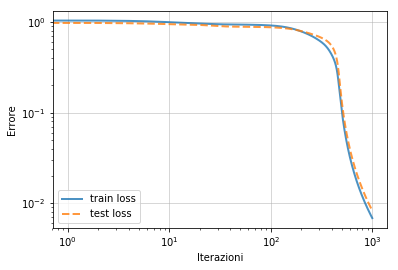

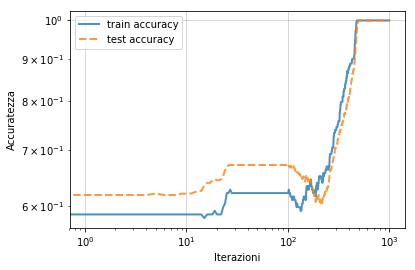

accuracy train: 1.0
accuracy test: 1.0
error train: 0.006869458004467427
error test: 0.008290710039559767
time: 37.7927529812
norm gradient last: 0.012088310312157888
iterazioni: 1000


In [18]:
plot_train_test_learning_curve_loss(loss_ts_sgd, error_tr_sgd)
plot_train_test_learning_curve_accuracy(mis_tr_sgd, mis_ts_sgd)
print "accuracy train:", 1 - mis_tr_sgd[-1]
print "accuracy test:", 1 - mis_ts_sgd[-1] if len(mis_ts_sgd) > 0 else None
print "error train:", error_tr_sgd[-1]
print "error test:", loss_ts_sgd[-1] if len(loss_ts_sgd) > 0 else None
print "time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]
print "iterazioni:", len(loss_tr_sgd)

## BFGS

In [19]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.0
epsilon = 1e-5
epochs = 1000

network = copy.deepcopy(common_network)

In [20]:
tic = time()
loss_tr_bfgs, error_tr_bfgs, mis_tr_bfgs, loss_ts_bfgs, mis_ts_bfgs, \
alphas_bfgs, norm_gradients_bfgs, \
cond_bfgs = network.train_BFGS(x_train=x_train,
                               y_train=y_train, 
                               x_test=x_test, 
                               y_test=y_test,
                               theta=theta, c_1=c_1, c_2=c_2, 
                               lossObject=loss_object, 
                               regularization=lambda_, 
                               epochs=epochs, epsilon=epsilon,
                               line_search='wolfe')
toc = time()

stop: gradient norm, epoch 64


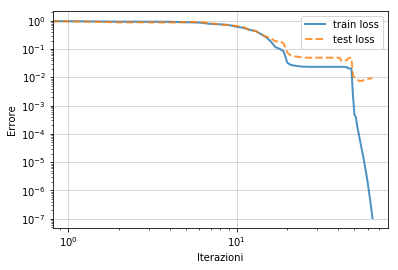

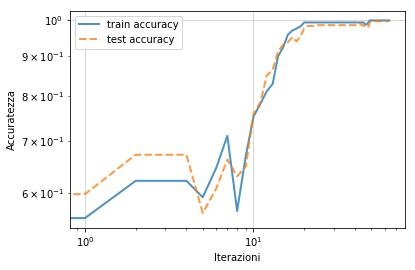

accuracy train: 1.0
accuracy test: 0.9976851851851852
error train: 1.0539840593089339e-07
error test: 0.009381245454802956
training time: 5.49818181992
norm gradient last: 7.5013817917589945e-06
iterazioni: 65


In [21]:
plot_train_test_learning_curve_loss(loss_ts_bfgs, error_tr_bfgs) 
plot_train_test_learning_curve_accuracy(mis_tr_bfgs, mis_ts_bfgs)
print "accuracy train:", 1 - mis_tr_bfgs[-1]
print "accuracy test:", 1 - mis_ts_bfgs[-1] if len(mis_ts_bfgs) > 0 else None
print "error train:", error_tr_bfgs[-1]
print "error test:", loss_ts_bfgs[-1] if len(loss_ts_bfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]
print "iterazioni:", len(loss_tr_bfgs)

# L- BFGS

In [22]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.0
epsilon = 1e-5
epochs = 1000
m = 5

network = copy.deepcopy(common_network)

In [23]:
tic = time()
loss_tr_lbfgs, error_tr_lbfgs, mis_tr_lbfgs, loss_ts_lbfgs, \
mis_ts_lbfgs, alphas_lbfgs, norm_gradients_lbfgs, \
cond_lbfgs = network.train_LBFGS(x_train=x_train,
                                 y_train=y_train,
                                 x_test=x_test, 
                                 y_test=y_test,
                                 theta=theta, c_1=c_1, c_2=c_2, 
                                 lossObject=loss_object,
                                 regularization=lambda_, 
                                 epochs=epochs, epsilon=epsilon, m=m, 
                                 line_search='wolfe')
toc = time()

stop: norm gradient, epoch 31


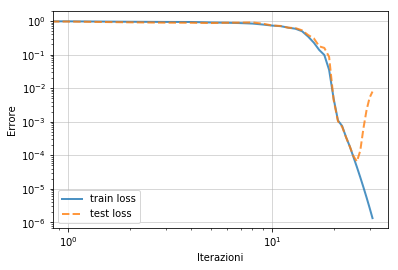

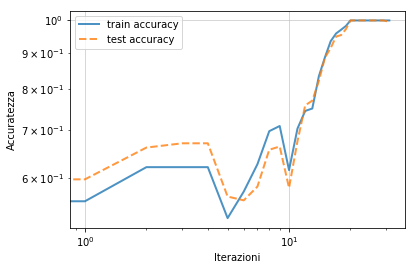

accuracy train: 1.0
accuracy test: 0.9976851851851852
error train: 1.3498847216393508e-06
error test: 0.007901780573733426
training time: 1.89845705032
norm gradient last: 5.844956924351147e-06
iterazioni: 32


In [24]:
plot_train_test_learning_curve_loss(loss_ts_lbfgs, error_tr_lbfgs)
plot_train_test_learning_curve_accuracy(mis_tr_lbfgs, mis_ts_lbfgs)
print "accuracy train:", 1 - mis_tr_lbfgs[-1]
print "accuracy test:", 1 - mis_ts_lbfgs[-1] if len(mis_ts_lbfgs) > 0 else None
print "error train:", error_tr_lbfgs[-1]
print "error test:", loss_ts_lbfgs[-1] if len(loss_ts_lbfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]
print "iterazioni:", len(loss_tr_lbfgs)

##  3) Optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)
- condition number of H vs iterations

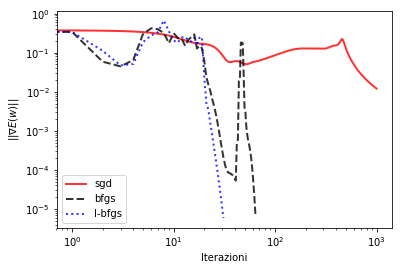

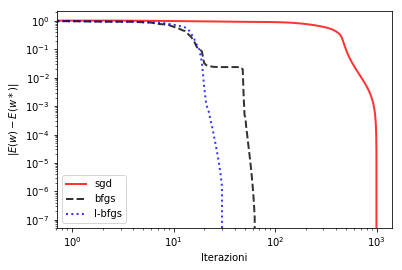

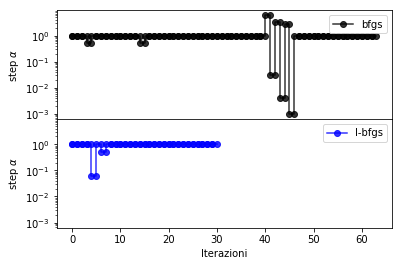

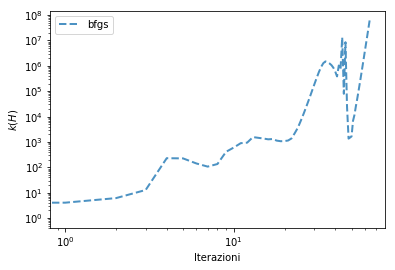

In [25]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)

#  4) Machine Learning plots
- training and validation loss vs iterations
- training and validation accuracy vs iterations

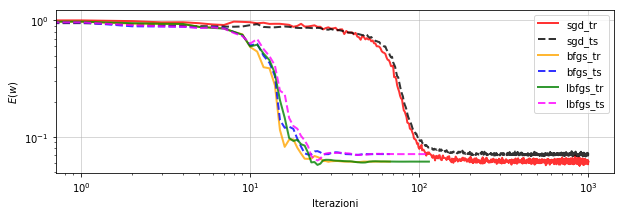

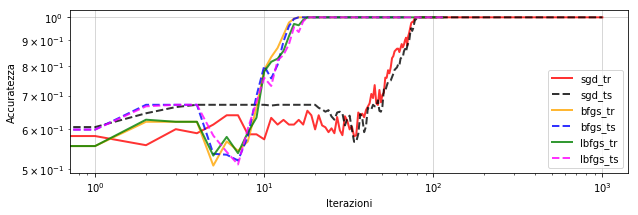

In [15]:
plot_all_loss(error_tr_sgd, loss_ts_sgd, error_tr_bfgs, loss_ts_bfgs, error_tr_lbfgs, loss_ts_lbfgs,\
             xscale='log', yscale='log')
plot_all_accuracy(mis_tr_sgd, mis_ts_sgd, mis_tr_bfgs, mis_ts_bfgs, mis_tr_lbfgs, mis_ts_lbfgs, \
                  xscale='log', yscale='log')